/var/folders/c4/_xp7_d7d7n704grns2yjp24m0000gn/T/ipykernel_37825/456537828.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["order date (DateOrders)"] = pd.to_datetime(df1["order date (DateOrders)"])
/var/folders/c4/_xp7_d7d7n704grns2yjp24m0000gn/T/ipykernel_37825/456537828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["date"] = dates
/Users/leeweijuin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25814D+00    |proj g|=  7.57371D-02

At iterate    5    f=  5.17443D+00    |proj g|=  1.96636D-02

At iterate   10    f=  5.03212D+00    |proj g|=  3.64492D-02

At iterate   15    f=  5.03131D+00    |proj g|=  4.59969D-05

At iterate   20    f=  5.02453D+00    |proj g|=  2.03876D-02
  ys=-5.219E-04  -gs= 4.481E-04 BFGS update SKIPPED

At iterate   25    f=  5.02353D+00    |proj g|=  7.78305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj

/Users/leeweijuin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:1963: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return self._engine.is_monotonic_increasing


KeyError: "['#Passengers'] not in index"

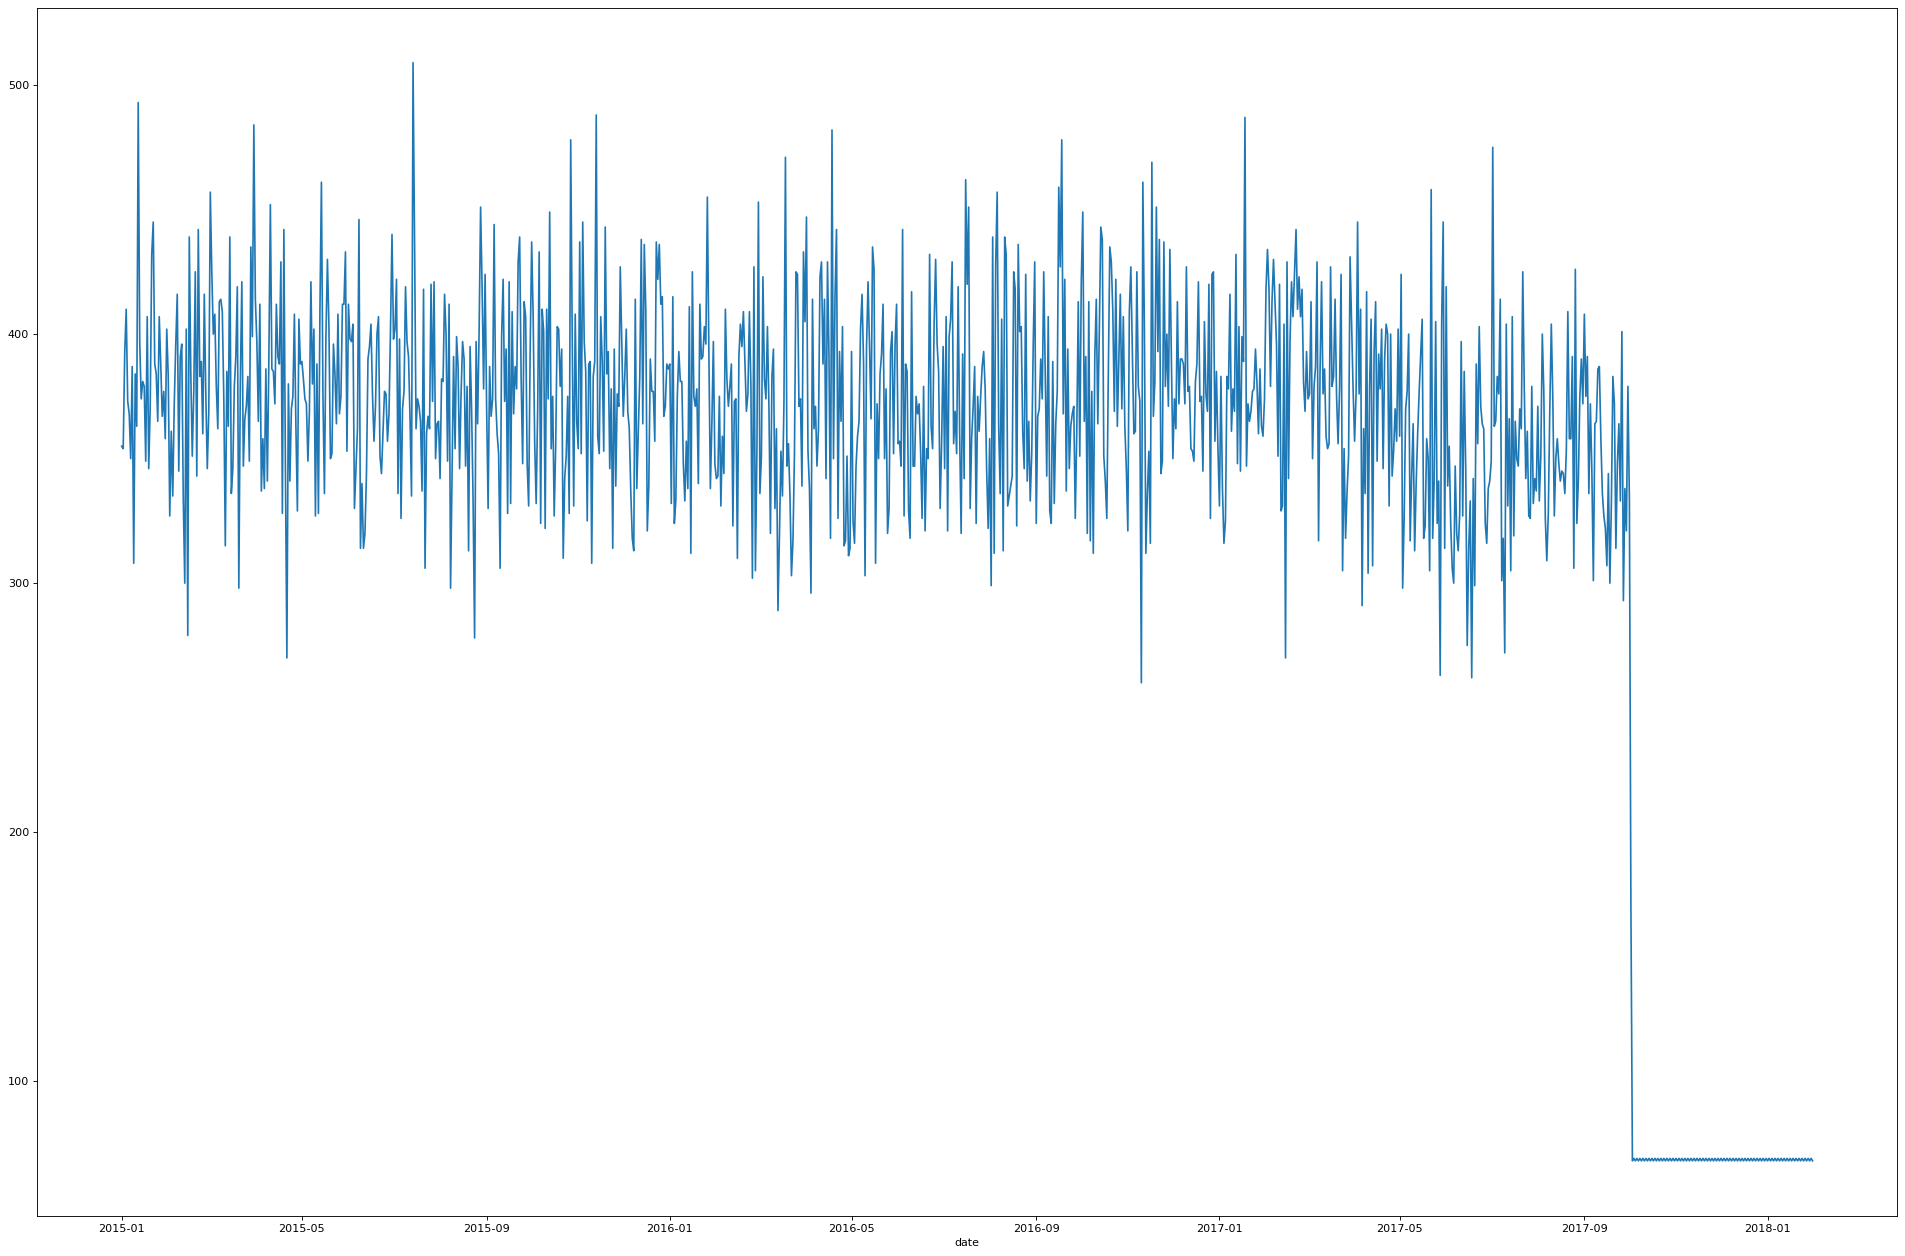

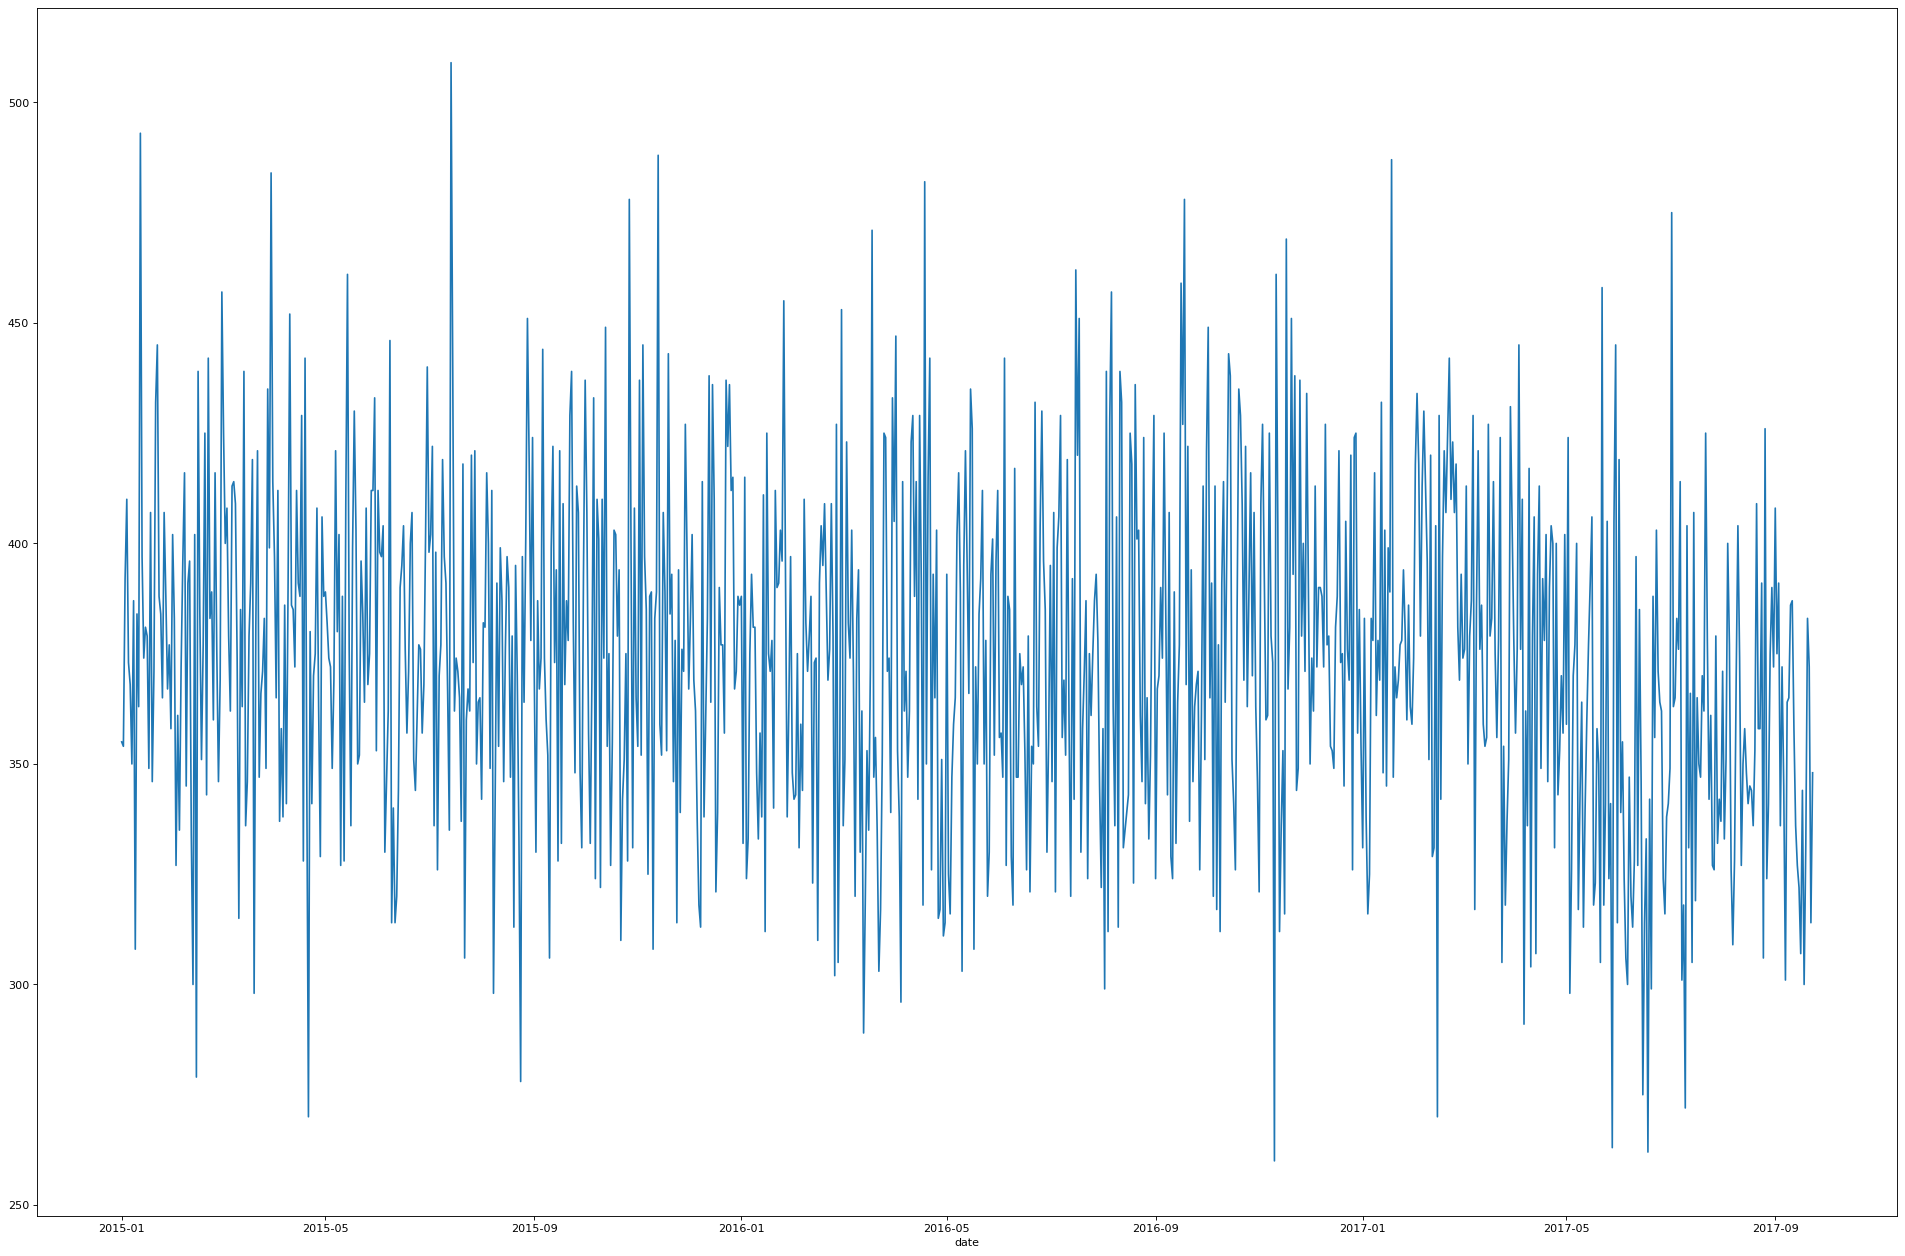

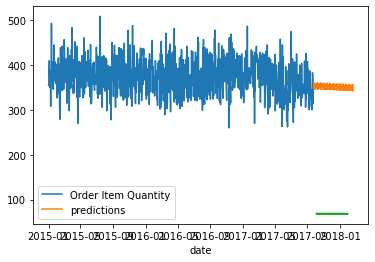

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv("BigSupplyCo_Orders(With_Coordinates).csv")

df.columns

df1 = df[["order date (DateOrders)",'Order Item Quantity','Category Name','Market','Product Name']]
df1["order date (DateOrders)"] = pd.to_datetime(df1["order date (DateOrders)"])

dates = []

for i in range(df1.shape[0]):
  dates.append(df1["order date (DateOrders)"].iloc[i].date())

df1["date"] = dates

df2 = df1.groupby(["date"])["Order Item Quantity"].sum()

from matplotlib.pyplot import figure

figure(figsize=(30, 20), dpi=80)

df2.plot()

series = df2.iloc[:-130]

series_under = df2.iloc[-120:]

figure(figsize=(30, 20), dpi=80)
series.plot()

series_df = pd.DataFrame(series)
series_df

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(series_df["Order Item Quantity"],order=(1,1,1),seasonal_order=(1, 1, 1, 12))
result=model.fit()

from pandas.tseries.offsets import DateOffset
new_dates=[series_df.index[-1]+DateOffset(days=x) for x in range(1,150)]
df_pred=pd.DataFrame(index=new_dates,columns =df.columns)
df_pred.head()

df3=pd.concat([series_df,df_pred])
 
 
df3['predictions']=result.predict(start=997,end=997+150)
df3[['Order Item Quantity','predictions']].plot()
series_under.plot()

df2=pd.concat([df,df_pred])
df2['predictions']=result.predict(start=143,end=191)
df2[['#Passengers','predictions']].plot()

import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(series_df['Order Item Quantity'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
figure(figsize=(30, 20), dpi=80)
autocorrelation_plot(series)
pyplot.show()

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()# Plotting rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
  # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)

test_stationarity(series)

